## Import Libraries



In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.util.testing as tm

##Reading the dataset


In [0]:

data=pd.read_csv('netflix_titles.csv')


##Descriptive Analysis

In [17]:
data.shape

(6234, 12)

In [18]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [19]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [20]:
mov=data.query("type=='Movie'")
mov['min']=mov['duration'].str.split(' ',expand=True)[0]
mov['min']=mov['min'].astype(int)
mov['hr']=mov['min']/60

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

##Top Movies by RunTime

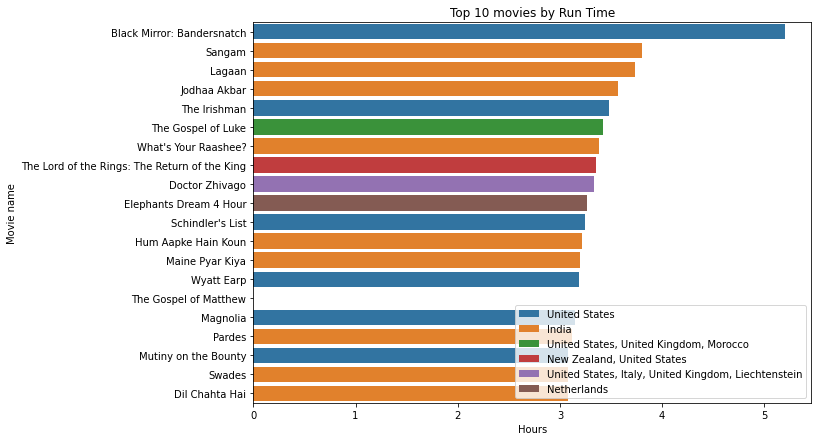

In [21]:
top20run=mov.sort_values(by='hr',ascending=False).head(20)
plt.figure(figsize=(10,7))
sns.barplot(data=top20run,y='title',x='hr',hue='country',dodge=False)
plt.legend(loc='lower right')
plt.title('Top 10 movies by Run Time')
plt.xlabel('Hours')
plt.ylabel('Movie name')
plt.show()

In [22]:
tv=data.query("type=='TV Show'")
tv['sea']=tv['duration'].str.split(' ',expand=True)[0]
tv['sea']=tv['sea'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


##Top TV Shows By No. of Seasons

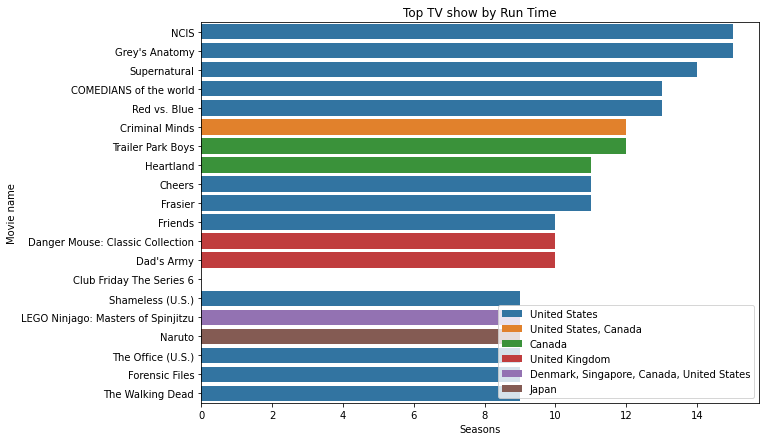

In [23]:
top20tv=tv.sort_values(by='sea',ascending=False).head(20)
plt.figure(figsize=(10,7))
sns.barplot(data=top20tv,y='title',x='sea',hue='country',dodge=False)
plt.legend(loc='lower right')
plt.title('Top TV show by Run Time')
plt.xlabel('Seasons')
plt.ylabel('Movie name')
plt.show()


##Most Common Director

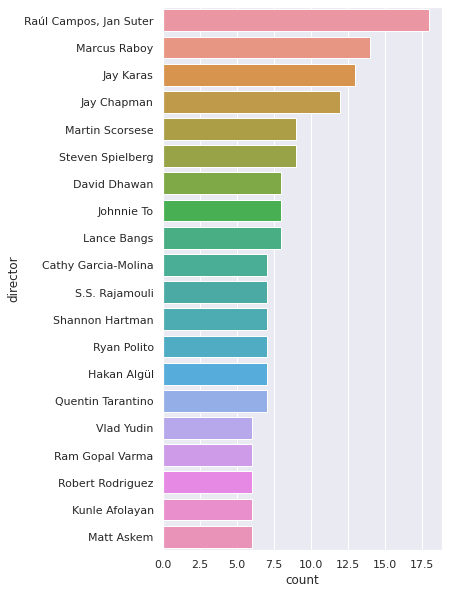

In [24]:
sns.set(style="darkgrid", palette="pastel", color_codes=True)
plt.figure(figsize=(5,10))
sns.countplot(y='director',data=data,order = data['director'].value_counts().head(20).index)
plt.show()

##Indian movie stars with most movies

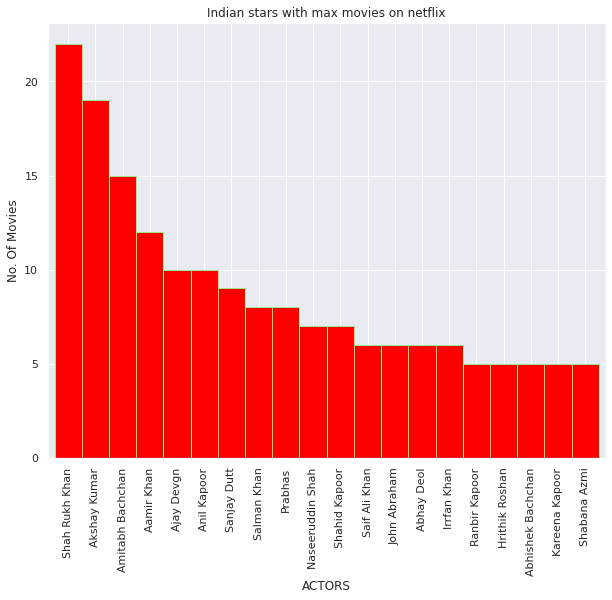

In [25]:
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
indcast=[]
ind=data.query('country=="India"')
for i in ind['cast']:
    indcast.append(i)
newls=[]
for i in indcast:
    newls.append(str(i).split(',')[0])
inddf=pd.DataFrame(newls,columns=['name'])
ind_df=inddf.drop(inddf.query('name=="nan"').index)
ind_df['name'].value_counts().head(20).plot(kind="bar",width=1,color='red',edgecolor='lightgreen',figsize=(10,8))
plt.xlabel("ACTORS")
plt.ylabel("No. Of Movies")
plt.title("Indian stars with max movies on netflix")
plt.show()

##US movie stars with most movies.

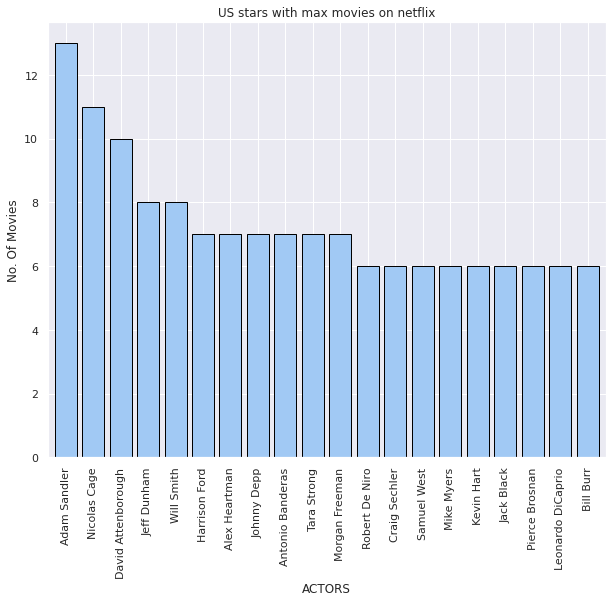

In [26]:
us=data[data['country'].str.contains('United States',na=False)]
uscast=[]
for i in us['cast']:
    uscast.append(i)
newls1=[]
for i in uscast:
    newls1.append(str(i).split(',')[0])
    
usdf=pd.DataFrame(newls1,columns=['name'])
us_df=usdf.drop(usdf.query('name=="nan"').index)
us_df['name'].value_counts().head(20).plot(kind="bar",width=.8,edgecolor='black',figsize=(10,8))
plt.xlabel("ACTORS")
plt.ylabel("No. Of Movies")
plt.title("US stars with max movies on netflix")
plt.show()

##Checking most common TV-rating content available on Netflix

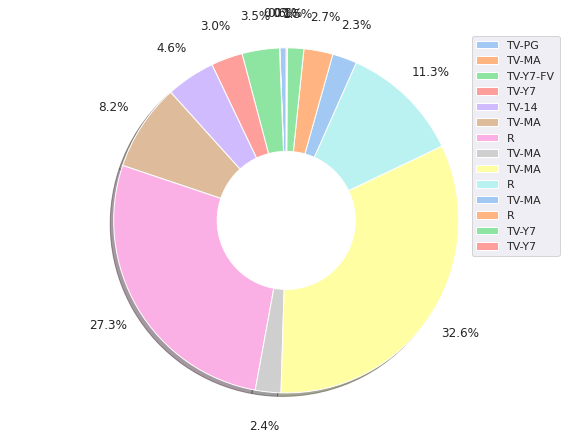

In [27]:
rat=data.groupby('rating')[['show_id']].count().reset_index()
plt.figure(figsize=(10,7))
plt.pie(rat['show_id'],autopct='%1.1f%%', startangle=90, pctdistance=1.2,shadow=True)
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.legend(data['rating'])
plt.show()

##Checking the month in which most content is added




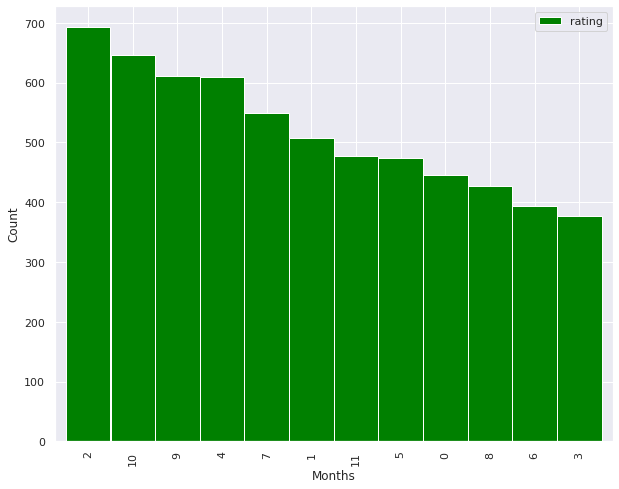

In [30]:
data['date']=pd.to_datetime(data['date_added'])
data['month']=data['date'].dt.strftime('%b')
data.groupby('month')[['rating']].count().reset_index().sort_values(by='rating',ascending = False ).plot(kind='bar',\
                                                                               width=1,color='green',figsize=(10,8))
plt.xlabel("Months")
plt.ylabel("Count")
plt.show()